In [1]:
import PIL.Image
import textwrap
from IPython.display import Markdown
import google.generativeai as genai
import os


def to_markdown(text):
    text = text.replace('•', '  *')
    return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

prompt = '''Please provide a thorough description of the image, including the objects, people, animals, scenery, colors, textures, and any notable details. Pay attention to the composition, lighting, and overall mood conveyed by the image. Describe any actions or interactions happening within the scene, as well as any emotions or atmosphere you perceive. Additionally, discuss any cultural or historical context that may be relevant to understanding the image. Your description should be detailed and vivid, enabling someone who hasn't seen the image to visualize it as accurately as possible.'''


def analyze_image(path):
    genai.configure(api_key=os.getenv("GOOGLE_API_KEY"))
    model = genai.GenerativeModel('gemini-pro-vision')
    img = PIL.Image.open(path)
    model = genai.GenerativeModel('gemini-pro-vision')
    response = model.generate_content([prompt , img], stream=True)
    response.resolve()
    pred_res = response.text
    
    return pred_res , img


In [2]:
img1 = 'istockphoto-502010086-612x612.jpg'
res , img = analyze_image(img1)

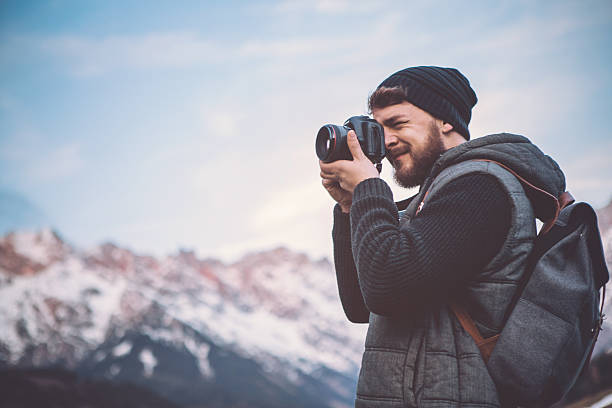

In [3]:
img

In [4]:
to_markdown(res)

>  In the image, there is a man wearing a black beanie and a gray zip-up sweater vest. He has a camera to his right eye and is looking through the viewfinder. He has a slight smile on his face. There is a gray backpack on his back and a brown camera strap around his neck. In the background, there is a mountain range covered in snow. The sky is blue and there are some clouds. The man is standing on a rocky hill. The image is well-lit and the colors are vibrant. The overall mood of the image is peaceful and serene.